<a href="https://colab.research.google.com/github/Gab2697/Human-Activity-Recognition/blob/master/Baseline_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

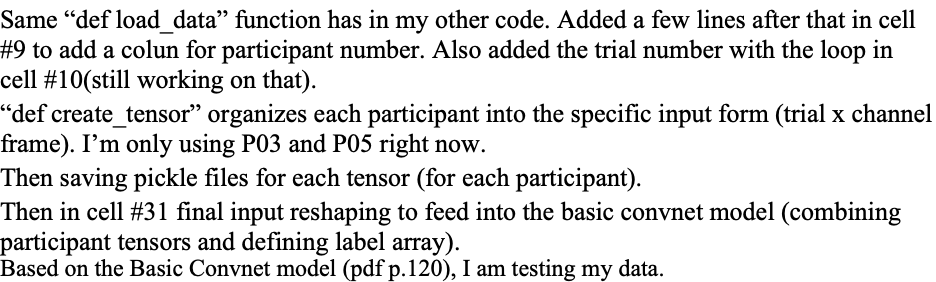

In [3]:
#import
import pandas as pd
import tensorflow as tf
import numpy as np
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Prepare the data

Function to load data, organize it by surface and add a specifique label depending on the name of the excel file

In [7]:
def load_data(path,keyword,col):

  Window=1926*2 
  df_asphalt = pd.DataFrame()
  df_grass = pd.DataFrame()
  for fname in os.listdir(path):
    if keyword in fname: 
      os.chdir(path)
      pd_xl_file = pd.ExcelFile(fname)
      df = pd_xl_file.parse("Sheet1") 
      dimensions = df.shape
      Middle=int(dimensions[0]/2)
      Participant=pd.read_excel(fname,sheet_name='Sheet1',  usecols = col)
      Participant['label'] = pd.DataFrame(np.ones(dimensions[0]),dtype=int)
      Participant=Participant.iloc[Middle-Window:Middle+Window]
      df_asphalt = df_asphalt.append(Participant)
      

    else:
      os.chdir(path)
      pd_xl_file_grass = pd.ExcelFile(fname)
      df2 = pd_xl_file_grass.parse("Sheet1") 
      dimensions_grass = df2.shape
      Middle_grass=int(dimensions_grass[0]/2)
      Participant_grass=pd.read_excel(fname,sheet_name='Sheet1', usecols = col)
      Participant_grass['label'] = pd.DataFrame(np.zeros(dimensions_grass[0]),dtype=int)
      Participant_grass=Participant_grass.iloc[Middle_grass-Window:Middle_grass+Window]
      df_grass = df_grass.append(Participant_grass)
      
  return df_asphalt, df_grass

Call load function and add specific columns (participant and trial number)

In [ ]:
#P01
path1= '/content/drive/MyDrive/Gab/P01/exported-1/'
df_asphalt_1, df_grass_1= load_data(path1,'sidewalk',"A,B,J,R,Z")
df_asphalt_1['participant_number']=1#add column for participant number
df_grass_1['participant_number']=1#add column for participant number
# df_asphalt_1['trial_number']=list(range(1,len(df_asphalt_1)+1),len(df_asphalt_1)/(1926*4))#add column for trial number
# df_grass_1['trial_number']=list(range(1,len(df_grass_1)+1),len(df_grass_1)/(1926*4))#add column for trial number
#P03
path3= '/content/drive/MyDrive/Gab/P03/exported-emg/'
df_asphalt_3, df_grass_3= load_data(path3,'asphalt',"A,B,D,L,T")
df_asphalt_3['participant_number']=3
df_grass_3['participant_number']=3
# df_asphalt_3['trial_number']=list(range(1,len(df_asphalt_3)+1),len(df_asphalt_3)/(1926*4))
# df_grass_3['trial_number']=list(range(1,len(df_grass_3)+1),len(df_grass_3)/(1926*4))
#P05
path5= '/content/drive/MyDrive/Gab/P05/exported-emg-5/'
df_asphalt_5, df_grass_5= load_data(path5,'asphalt',"A,B,D,L,T")
df_asphalt_5['participant_number']=5
df_grass_5['participant_number']=5
# df_asphalt_5['trial_number']=list(range(1,len(df_asphalt_5)+1),len(df_asphalt_5)/(1926*4))
# df_grass_5['trial_number']=list(range(1,len(df_grass_5)+1),len(df_grass_5)/(1926*4))
#P07
path7= '/content/drive/MyDrive/Gab/P07/exported-emg-7/'
df_asphalt_7, df_grass_7= load_data(path7,'asphalt',"A,B,D,L,T")
df_asphalt_7['participant_number']=7
df_grass_7['participant_number']=7
# df_asphalt_7['trial_number']=list(range(1,len(df_asphalt_7)+1),len(df_asphalt_7)/(1926*4))
# df_grass_7['trial_number']=list(range(1,len(df_grass_7)+1),len(df_grass_7)/(1926*4))
#P09
path9= '/content/drive/MyDrive/Gab/P09/exported-emg-9/'
df_asphalt_9, df_grass_9= load_data(path9,'asphalt',"A,B,D,L,T")
df_asphalt_9['participant_number']=9
df_grass_9['participant_number']=9
# df_asphalt_9['trial_number']=list(range(1,len(df_asphalt_9)+1),len(df_asphalt_9)/(1926*4))
# df_grass_9['trial_number']=list(range(1,len(df_grass_9)+1),len(df_grass_9)/(1926*4))

Add column for trial numnber

In [42]:
#asphalt
skip_asphalt_3=list(range(1,len(df_grass_5)+1,round(len(df_grass_5)/(1926*4))))
skip_asphalt_3=np.array(skip_asphalt_3)
for cnt in range(1,len(df_asphalt_3)):
  if cnt==(skip_asphalt_3).any(): 
    cnt=+1
    df_asphalt_3['trial_number']=cnt
  else:
    df_asphalt_3['trial_number']=cnt 

  df_asphalt_3['trial_number'].append(cnt) 
#grass
# skip_grass_3=list(range(1,len(df_grass_5)+1,round(len(df_grass_5)/(1926*4))))
# skip_grass_3=np.array(skip_grass_3)
# for cnt_g in range(1,len(df_asphalt_3)):
#   if cnt_g==skip_grass_3: 
#     cnt_g=+1  
#     df_grass_3['trial_number']=cnt_g
#     df_grass_3['trial_number']=cnt_g

TypeError: ignored

In [25]:
#removing for now
df_asphalt_3=df_asphalt_3.iloc[:,0:7]
df_asphalt_3

,X [s],Trigno sensor 1-TA: EMG 1 [Volts],Trigno sensor 2-Gastroc: EMG 2 [Volts],Trigno sensor 3-RF: EMG 3 [Volts],Trigno sensor 4-BF: EMG 4 [Volts],label,participant_number
5768,2.994923,2.517739e-06,-4.196231e-06,1.678492e-07,0.000000,1,3
5769,2.995442,1.846342e-06,3.189136e-06,-1.678492e-07,0.000000,1,3
5770,2.995962,1.510643e-06,4.196231e-06,1.510643e-06,0.000000,1,3
5771,2.996481,6.713969e-07,2.517739e-06,1.846342e-06,0.000000,1,3
5772,2.997000,1.510643e-06,5.035477e-07,2.517739e-06,0.000000,1,3
...,...,...,...,...,...,...,...
11543,5.993481,-2.601663e-05,1.678492e-06,7.721065e-06,0.000096,1,3
11544,5.994000,-2.568093e-05,8.560311e-06,7.553216e-06,0.000050,1,3
11545,5.994519,-2.500954e-05,-8.392462e-07,5.874723e-06,-0.000016,1,3
11546,5.995038,-2.517739e-05,-1.661708e-05,5.539025e-06,-0.000085,1,3


Creating a tensor with specific shape (trial x channel x frame)

In [26]:
def create_tensor(df_a,df_g):
  #tensor asphalt
  trials_a=len(df_a)/(1926*4) # how many trials
  T_asphalt=np.stack(np.split(df_a.values, trials_a), axis=1)
  #tensor grass
  trials_g=len(df_g)/(1926*4) # how many trials
  T_grass=np.stack(np.split(df_g.values, trials_g), axis=1)
  #tensor both conditions
  a=tf.constant(T_asphalt)
  g=tf.constant(T_grass)
  T = tf.concat([a, g], axis=0)

  return T

In [27]:
# T1=create_tensor(df_asphalt_1,df_grass_1)
# print("T1 shape:", T1.shape)

T3=create_tensor(df_asphalt_3,df_grass_3)
print("T3 shape:", T3.shape)

T5=create_tensor(df_asphalt_5,df_grass_5)
print("T5 shape:", T5.shape)

# T7=create_tensor(df_asphalt_7,df_grass_7)
# print("T7 shape:", T7.shape)

# T9=create_tensor(df_asphalt_9,df_grass_9)
# print("T9 shape:", T9.shape)


T3 shape: (15408, 80, 7)
T5 shape: (15408, 80, 7)


Save in drive (pickle)

In [28]:
#only do once
import pickle
def save_pickle(path_pickle,T):
  f = open(path_pickle, 'wb')
  pickle.dump(T, f)
  f.close()

  return f 

#call function
# f1=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/T1.pickle',T1)
f3=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/T3.pickle',T3)
f5=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/T5.pickle',T5)
# f7=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/T7.pickle',T7)
# f9=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/T9.pickle',T9)


In [30]:
def open_pickle(path_pickle,f):
  f = open(path_pickle, 'rb')
  T = pickle.load(f)
  f.close()

  return T

#call function
# T1=open_pickle('/content/drive/MyDrive/Gab/Variables_saved/T1.pickle',f1)
T3=open_pickle('/content/drive/MyDrive/Gab/Variables_saved/T3.pickle',f3)
T5=open_pickle('/content/drive/MyDrive/Gab/Variables_saved/T5.pickle',f5)
# T7=open_pickle('/content/drive/MyDrive/Gab/Variables_saved/T7.pickle',f7)
# T9=open_pickle('/content/drive/MyDrive/Gab/Variables_saved/T9.pickle',f9)


Final input data and label reshaping

In [54]:
import pandas as pd 
#participant size= number of trials 
participant_size_3= len(T3)
participant_size_5= len(T5)

#X-data with shape (trialxchannelsxframe)=(80trials  x 4channels x (1926frames x 4sec x 2surfaces x n-participants))
T = tf.concat([T3, T5], axis=0) # 2 participants just for testing 
X=T[:, :, 1:5].numpy() 
print("Data shape:", X.shape)
#Y-categorical encoded label = 1 for asphalt and 0 for grass 
y=T[:,:,6].numpy()
print("Label shape:", y.shape)
X


Data shape: (30816, 80, 4)
Label shape: (30816, 80)


array([[[ 2.51773872e-06, -4.19623120e-06,  1.67849237e-07,
          0.00000000e+00],
        [ 5.93011384e-04, -1.61470976e-04, -9.21492319e-05,
         -5.55580991e-05],
        [ 4.64942386e-05,  0.00000000e+00, -2.09811551e-05,
          2.52780970e-04],
        ...,
        [-7.88891430e-06,  5.76562132e-04,  3.42412459e-05,
         -1.35454335e-04],
        [ 2.53452345e-05,  6.96574352e-05,  1.10780502e-05,
         -9.91989000e-05],
        [ 5.62294954e-05,  1.49217973e-04,  3.02128628e-05,
         -2.70740828e-04]],

       [[ 1.84634166e-06,  3.18913567e-06, -1.67849237e-07,
          0.00000000e+00],
        [ 5.78240608e-04, -2.08636600e-04, -7.16716240e-05,
         -1.93026626e-05],
        [-7.04966806e-05,  0.00000000e+00, -2.16525514e-05,
          2.41535061e-04],
        ...,
        [ 3.82696271e-05,  5.55077451e-04,  3.28984497e-05,
         -1.11284047e-04],
        [ 4.90119783e-05,  8.02319337e-05,  1.00709549e-05,
         -8.96314959e-05],
        [ 5.354

#Basic Convnet

In [69]:
from keras import layers 
from keras import models

#Instantiating a small convnet
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(24652, 80, 4))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24650, 78, 32)     1184      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12325, 39, 32)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12323, 37, 64)     18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6161, 18, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6159, 16, 64)      36928     
                                                                 
Total params: 56,608
Trainable params: 56,608
Non-traina

In [34]:
#Adding a classifier on top of the convnet
model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(2, activation='sigmoid'))


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24650, 78, 32)     1184      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12325, 39, 32)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12323, 37, 64)     18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6161, 18, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6159, 16, 64)      36928     
                                                                 
 flatten (Flatten)           (None, 6306816)           0

Normalize data to be betwen 0 and 1

In [ ]:
#max normal=[0,1] interval
def normalization(emg):
    max_data=max(emg)
    min_data=min(emg)
#itterer pour chaque column 
    emg_df = pd.DataFrame(emg)
    emg_normalized_all=[]
    for i in range(0,len(emg_df)):
      EMG_normalized=(emg_df.iloc[i]-min_data)/(max_data-min_data)
      emg_normalized_all.append(EMG_normalized)# adding the element to the array

    return emg_normalized_all

In [ ]:
#call normalization function-- individual muscle
emg_nomali=normalization(emg) 

In [67]:
#Training the convnet on P03 and P05
# from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# valid_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))

print('shape data to train:', X_train.shape) # 80% of data to train 
print('shape label to train:', y_train.shape)
batch_size=1 
X_train=X_train.reshape(batch_size,24652, 80, 4)
y_train=y_train.reshape(batch_size,24652, 80)
print('reshape data to train:', X_train.shape) 
print('reshape label to train:', y_train.shape)



shape data to train: (24652, 80, 4)
shape label to train: (24652, 80)
reshape data to train: (1, 24652, 80, 4)
reshape label to train: (1, 24652, 80)


In [70]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) 
model.fit(X_train, y_train, epochs=5, batch_size=24652) #1926*4

Epoch 1/5


ValueError: ignored

In [ ]:
#test accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
test_acc